# Name:kadam shivani

# Task:3/DATA SCIENCE INTERN

# Stock market prediction and forecasting using stacked LSTM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv(r"C:\Users\shivu\Desktop\NSE-TATAGLOBAL.csv")
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [3]:
data.shape

(2035, 8)

In [4]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [6]:
data.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [7]:
data.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [8]:
data["Date"]=pd.to_datetime(data.Date,format="%Y-%m-%d")
data.index=data['Date']
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,,
2018-09-28,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
2018-09-27,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2018-09-26,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
2018-09-25,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2018-09-24,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2010-07-27,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2010-07-26,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2010-07-23,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31


In [9]:
del data["Date"]

In [10]:
df=data.reset_index()['Open']
df

0       234.05
1       234.55
2       240.00
3       233.30
4       233.55
         ...  
2030    117.60
2031    120.10
2032    121.80
2033    120.30
2034    122.10
Name: Open, Length: 2035, dtype: float64

# data visualization


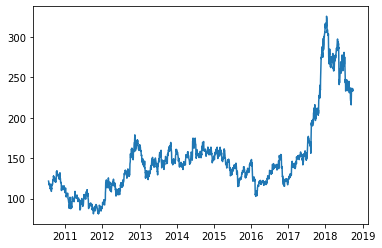

In [11]:
plt.plot(data['Close'])

In [12]:
#feature scaling

In [13]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df).reshape(-1,1))
df1

array([[0.6202352 ],
       [0.62226277],
       [0.64436334],
       ...,
       [0.16504461],
       [0.15896188],
       [0.16626115]])

# data splitting

In [14]:
training_size=int(len(df1)*0.75)
test_size=len(df1) - training_size
train_data = df1[0:training_size,:]
test_data = df1[training_size:len(df1), :1]

In [15]:
training_size , test_size

(1526, 509)

In [16]:
def datasetCrtd(dataset, time_step=1):
    datax,datay = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        datax.append(a)
        datay.append(dataset[i + time_step, 0])
        return np.array(datax), np.array(datay)

In [17]:
time_step=100
X_train,y_train =datasetCrtd(train_data, time_step)
X_test,y_test = datasetCrtd(test_data, time_step)

In [18]:
train_data,test_data

(array([[0.6202352 ],
        [0.62226277],
        [0.64436334],
        ...,
        [0.18491484],
        [0.15774534],
        [0.16180049]]),
 array([[0.15774534],
        [0.15774534],
        [0.16991079],
        [0.13746959],
        [0.14963504],
        [0.16605839],
        [0.15369019],
        [0.14152474],
        [0.13341444],
        [0.13260341],
        [0.12368208],
        [0.12246553],
        [0.13625304],
        [0.11719384],
        [0.13746959],
        [0.15004055],
        [0.15308191],
        [0.15794809],
        [0.15186537],
        [0.14557989],
        [0.14497161],
        [0.14801298],
        [0.14476886],
        [0.11719384],
        [0.11151663],
        [0.10563666],
        [0.10218978],
        [0.09712084],
        [0.09691809],
        [0.11131387],
        [0.10644769],
        [0.11111111],
        [0.1202352 ],
        [0.11922141],
        [0.13219789],
        [0.10969181],
        [0.11232766],
        [0.10097324],
        [0.097120

## convert an array of values into a dataset matrix

In [19]:
def create_dataset(dataset, time_step=1):
    train_X, train_Y = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        train_X.append(a)
        train_Y.append(dataset[i + time_step, 0])
    return numpy.array(train_X), numpy.array(train_Y)

## reshape into X=t,t+1,t+2,t+3 and Y=t+4

In [20]:
import numpy
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
print(X_train.shape), print(y_train.shape)

(1425, 100)
(1425,)


(None, None)

## reshape input to be [samples, time steps, features] which is required for LSTM

In [22]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

## Create the Stacked LSTM model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
23/23 [==============================] - 11s 234ms/step - loss: 0.0255 - val_loss: 0.0067
Epoch 2/100
23/23 [==============================] - 3s 131ms/step - loss: 0.0025 - val_loss: 0.0010
Epoch 3/100
23/23 [==============================] - 3s 131ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 4/100
23/23 [==============================] - 3s 133ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 5/100
23/23 [==============================] - 3s 148ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 6/100
23/23 [==============================] - 3s 136ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 7/100
23/23 [==============================] - 3s 144ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 8/100
23/23 [==============================] - 3s 139ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 9/100
23/23 [==============================] - 3s 135ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 10/100
23/23 [==============================] - 3s 137ms/step - loss: 0.0010 - val_l

In [27]:
import tensorflow as tf

## Lets Do the prediction and check performance metrics

In [28]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

13/13 [==============================] - 0s 29ms/step


In [29]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

## Calculate RMSE performance metrics

In [30]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

161.18224681435385

## Test Data RMSE

In [31]:
math.sqrt(mean_squared_error(ytest,test_predict))

105.95300079231012

## shift train predictions for plotting

In [32]:
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

## shift test predictions for plotting

In [33]:
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

## plot baseline and predictions

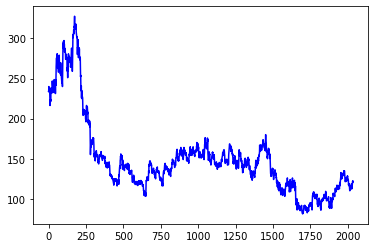

In [34]:
pred  = scaler.inverse_transform(df1)
plt.plot(pred,color='blue')
plt.show()

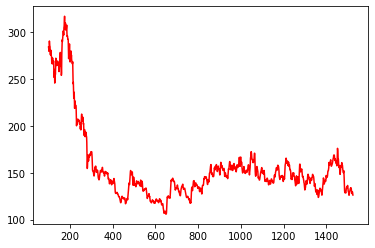

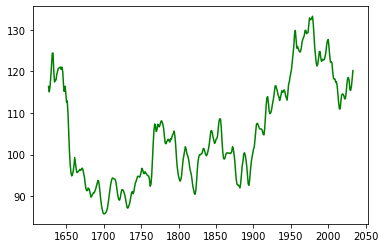

In [35]:
plt.plot(trainPredictPlot,color='red')
plt.show()
plt.plot(testPredictPlot,color='green')
plt.show()

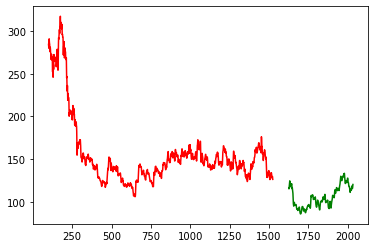

In [36]:
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='green')
plt.show()

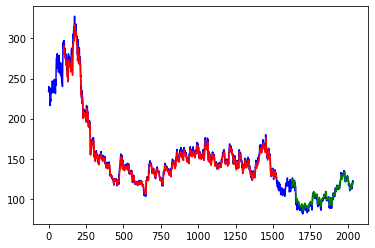

In [37]:
plt.plot(pred,color='blue')
plt.plot(trainPredictPlot,color='red')
plt.plot(testPredictPlot,color='green')
plt.show()

In [38]:
len(test_data)

509

In [39]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 168)

## Save the Model

In [40]:
model.save("saved_model.h5")